In [1]:
import numpy as np
import pandas as pd

dataset_folder_root_path = '../datasets'

zalando_dataset = '/imageBasedModel/zalando/zalando_ea4bf73acd0119c31a8a708bce2a2b302e72c1ecebc7c2265ee80cff3a15ed0a.parquet'

zalando_dataset_df = pd.read_parquet(f'{dataset_folder_root_path}/{zalando_dataset}')
zalando_dataset_df

,Innerwear_imagePath,outfit_id,Bottomwear_imagePath,Shoes_imagePath,Accessoire_imagePath,Outerwear_imagePath,valid_outfit,outfit_type
5Bay-ErCSwa,woman_outfits/5Bay-ErCSwa/1.jpg,5Bay-ErCSwa,woman_outfits/5Bay-ErCSwa/2.jpg,woman_outfits/5Bay-ErCSwa/3.jpg,woman_outfits/5Bay-ErCSwa/4.jpg,None,1,sporty
p_pBMObnSJC,woman_outfits/p_pBMObnSJC/6.jpg,p_pBMObnSJC,woman_outfits/p_pBMObnSJC/7.jpg,woman_outfits/p_pBMObnSJC/8.jpg,None,None,1,sporty
lqdPJ6bSSvi,woman_outfits/lqdPJ6bSSvi/4.jpg,lqdPJ6bSSvi,woman_outfits/lqdPJ6bSSvi/5.jpg,woman_outfits/lqdPJ6bSSvi/6.jpg,None,None,1,sporty
KVp2TJLCRKK,woman_outfits/KVp2TJLCRKK/1.jpg,KVp2TJLCRKK,woman_outfits/KVp2TJLCRKK/2.jpg,woman_outfits/KVp2TJLCRKK/3.jpg,None,None,1,sporty
RB46hJHCSPy,woman_outfits/RB46hJHCSPy/0.jpg,RB46hJHCSPy,woman_outfits/RB46hJHCSPy/1.jpg,woman_outfits/RB46hJHCSPy/2.jpg,None,None,1,sporty
...,...,...,...,...,...,...,...,...
JikHXNxmRmK,woman_outfits/JikHXNxmRmK/0.jpg,JikHXNxmRmK,woman_outfits/JikHXNxmRmK/1.jpg,None,woman_outfits/JikHXNxmRmK/2.jpg,None,1,classic
J2VGbVXHQqO,woman_outfits/J2VGbVXHQqO/0.jpg,J2VGbVXHQqO,woman_outfits/J2VGbVXHQqO/1.jpg,None,woman_outfits/J2VGbVXHQqO/3.jpg,None,1,classic
LHJPBmKJSzC,woman_outfits/LHJPBmKJSzC/0.jpg,LHJPBmKJSzC,woman_outfits/LHJPBmKJSzC/1.jpg,woman_outfits/LHJPBmKJSzC/2.jpg,woman_outfits/LHJPBmKJSzC/3.jpg,None,1,classic
CfzKc2nlQPC,woman_outfits/CfzKc2nlQPC/1.jpg,CfzKc2nlQPC,woman_outfits/CfzKc2nlQPC/2.jpg,woman_outfits/CfzKc2nlQPC/3.jpg,None,woman_outfits/CfzKc2nlQPC/0.jpg,1,classic


In [2]:
from src.outfit_recommendation.WearType import WearType


def get_record(df_record, key_name, clothing_item_type: WearType):
    return {
        'img_src': df_record[key_name],
        'outfit_type': clothing_item_type
    }


clothing_items = []
for index, outfit in zalando_dataset_df.iterrows():
    clothing_items.append(get_record(outfit, 'Innerwear_imagePath', WearType.innerWear))
    clothing_items.append(get_record(outfit, 'Bottomwear_imagePath', WearType.bottomWear))
    clothing_items.append(get_record(outfit, 'Shoes_imagePath', WearType.shoes))
    clothing_items.append(get_record(outfit, 'Accessoire_imagePath', WearType.accessoire))
    clothing_items.append(get_record(outfit, 'Outerwear_imagePath', WearType.outerWear))

clothing_items_df = pd.DataFrame(clothing_items)
clothing_items_df

,img_src,outfit_type
0,woman_outfits/5Bay-ErCSwa/1.jpg,2
1,woman_outfits/5Bay-ErCSwa/2.jpg,4
2,woman_outfits/5Bay-ErCSwa/3.jpg,5
3,woman_outfits/5Bay-ErCSwa/4.jpg,1
4,None,3
...,...,...
5250,woman_outfits/HceZRZ9qSS2/0.jpg,2
5251,woman_outfits/HceZRZ9qSS2/1.jpg,4
5252,None,5
5253,None,1


In [3]:
clothing_items_df = clothing_items_df[~clothing_items_df['img_src'].isnull()]
clothing_items_df

,img_src,outfit_type
0,woman_outfits/5Bay-ErCSwa/1.jpg,2
1,woman_outfits/5Bay-ErCSwa/2.jpg,4
2,woman_outfits/5Bay-ErCSwa/3.jpg,5
3,woman_outfits/5Bay-ErCSwa/4.jpg,1
5,woman_outfits/p_pBMObnSJC/6.jpg,2
...,...,...
5246,woman_outfits/CfzKc2nlQPC/2.jpg,4
5247,woman_outfits/CfzKc2nlQPC/3.jpg,5
5249,woman_outfits/CfzKc2nlQPC/0.jpg,3
5250,woman_outfits/HceZRZ9qSS2/0.jpg,2


In [4]:

def get_potential_outfits(clothing_items_df, number_of_potential_outfits, random_state=123):
    inner_wear = clothing_items_df[clothing_items_df['outfit_type'] == WearType.innerWear]

    bottom_wear = clothing_items_df[clothing_items_df['outfit_type'] == WearType.bottomWear]
    shoes = clothing_items_df[clothing_items_df['outfit_type'] == WearType.shoes]
    accessoires = clothing_items_df[clothing_items_df['outfit_type'] == WearType.accessoire]
    outer_wear = clothing_items_df[clothing_items_df['outfit_type'] == WearType.outerWear]

    potential_outfit_df = pd.DataFrame(data={
        'Innerwear_imagePath': list(
            inner_wear.sample(n=number_of_potential_outfits, random_state=random_state)['img_src']),
        'Bottomwear_imagePath': list(
            bottom_wear.sample(n=number_of_potential_outfits, random_state=random_state)['img_src']),
        'Shoes_imagePath': list(shoes.sample(n=number_of_potential_outfits, random_state=random_state)['img_src']),
        'Accessoire_imagePath': list(
            accessoires.sample(n=number_of_potential_outfits, random_state=random_state)['img_src']),
        'Outerwear_imagePath': list(
            outer_wear.sample(n=number_of_potential_outfits, random_state=random_state)['img_src'])
    })

    return potential_outfit_df


potential_outfits_df = get_potential_outfits(clothing_items_df, 50)
potential_outfits_df

,Innerwear_imagePath,Bottomwear_imagePath,Shoes_imagePath,Accessoire_imagePath,Outerwear_imagePath
0,woman_outfits/jJX5t7THQ1i/1.jpg,woman_outfits/jJX5t7THQ1i/2.jpg,woman_outfits/TKhBMND9THi/2.jpg,woman_outfits/m02Jg7GTTLu/4.jpg,woman_outfits/dbRY3HQpTBm/0.jpg
1,woman_outfits/g0wfzn47Qfu/1.jpg,woman_outfits/g0wfzn47Qfu/2.jpg,woman_outfits/Q0-EJFrZTBu/4.jpg,woman_outfits/lWxyjryaRo-/2.jpg,woman_outfits/33hRLe7nQyC/2.jpg
2,woman_outfits/hXZB3j6BTLG/0.jpg,woman_outfits/hXZB3j6BTLG/1.jpg,woman_outfits/ixg6EVRKQw2/2.jpg,woman_outfits/nGOcdx0ZRV6/3.jpg,woman_outfits/JAfXy0FPR0S/0.jpg
3,woman_outfits/PsMYc-3pSLq/1.jpg,woman_outfits/PsMYc-3pSLq/2.jpg,woman_outfits/gwYSlyo1TSK/4.jpg,woman_outfits/6En0jJMjREi/4.jpg,woman_outfits/NHyQrrTtRiG/0.jpg
4,woman_outfits/afBMHje0Q1O/0.jpg,woman_outfits/afBMHje0Q1O/2.jpg,woman_outfits/2Xv2J8O0TsC/2.jpg,woman_outfits/Bqz2ln2lQ3-/4.jpg,woman_outfits/2KlDRuMWRIC/0.jpg
5,woman_outfits/x90kMxzXSma/0.jpg,woman_outfits/x90kMxzXSma/1.jpg,woman_outfits/1LmjMAs1RKW/3.jpg,woman_outfits/drc22zkRST-/3.jpg,woman_outfits/aBhMB9NFR4e/0.jpg
6,woman_outfits/4AeNmv5-Q2u/0.jpg,woman_outfits/4AeNmv5-Q2u/1.jpg,woman_outfits/nT88q5IbTh6/3.jpg,woman_outfits/1k7M6sH-TiC/3.jpg,woman_outfits/ELNibZUkSMu/0.jpg
7,woman_outfits/EjdPHI_gRSy/0.jpg,woman_outfits/EjdPHI_gRSy/1.jpg,woman_outfits/NpbdlD6bSMO/4.jpg,woman_outfits/NshNrVxuSyq/4.jpg,woman_outfits/J1X7Gy47Tdq/0.jpg
8,woman_outfits/Ac97FhCETHy/1.jpg,woman_outfits/Ac97FhCETHy/2.jpg,woman_outfits/E01wD-xiQeW/3.jpg,woman_outfits/y3V8O7JlR0W/3.jpg,woman_outfits/dHyLgTuARxO/0.jpg
9,woman_outfits/QIosKpWfQqe/0.jpg,woman_outfits/QIosKpWfQqe/1.jpg,woman_outfits/DO9dWvX2TyC/3.jpg,woman_outfits/XgdTN2ZaSs-/2.jpg,woman_outfits/EUyDcZByQ16/0.jpg


In [5]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
from src.outfit_recommendation.models.dino_v2_based import OutfitClassifier
from src.outfit_recommendation.outfit_recommender import OutfitRecommender

outfit_recommendre = OutfitRecommender(
    f'{dataset_folder_root_path}/imageBasedModel/zalando',
    device
)

random_seed = 9
number_of_good_outfits = 7

# cosmic-sunset-49 (q1 threshold)

Using cache found in /Users/romanzberg/.cache/torch/hub/facebookresearch_dinov2_main
/Users/romanzberg/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/Users/romanzberg/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/Users/romanzberg/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


0


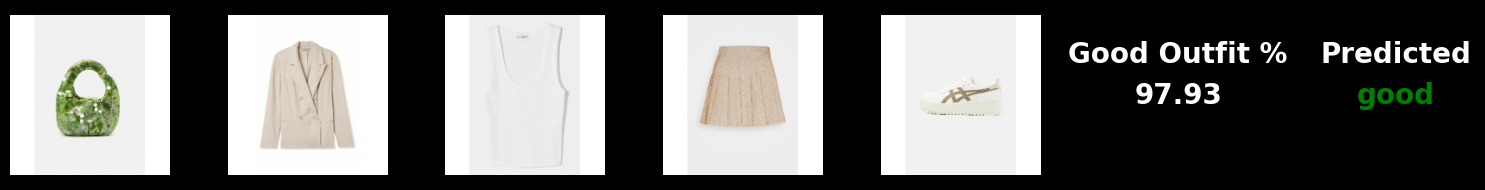

1


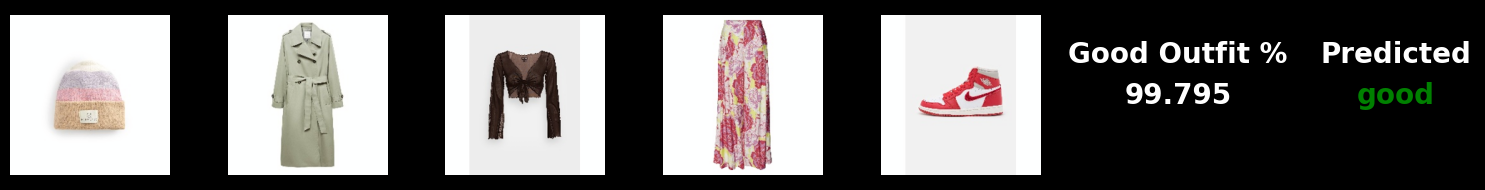

2


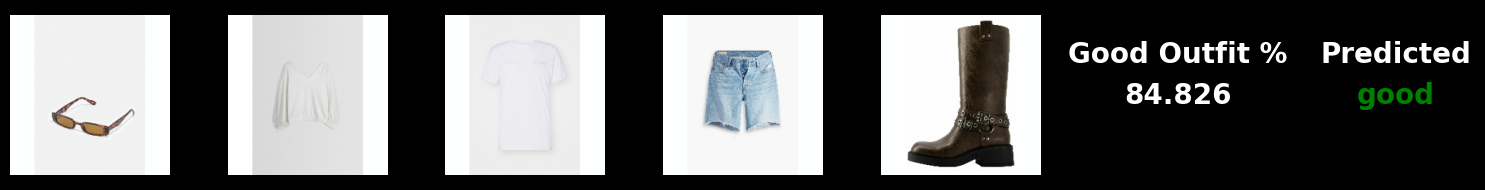

3


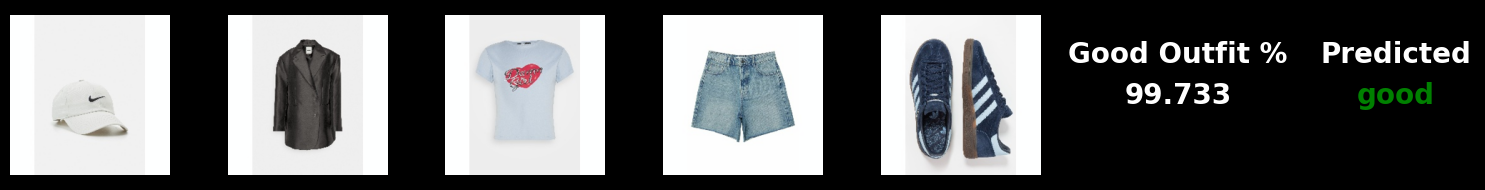

4


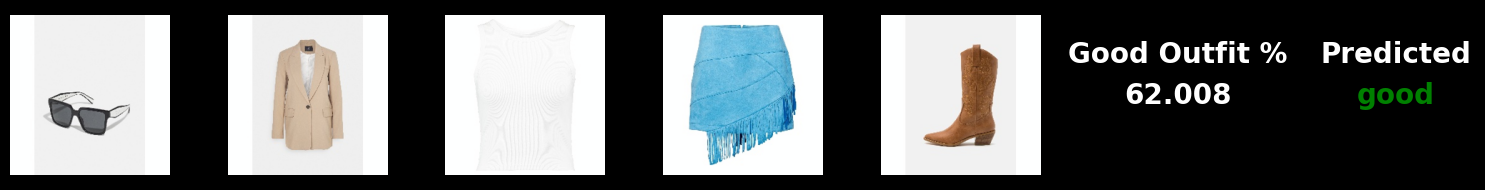

5


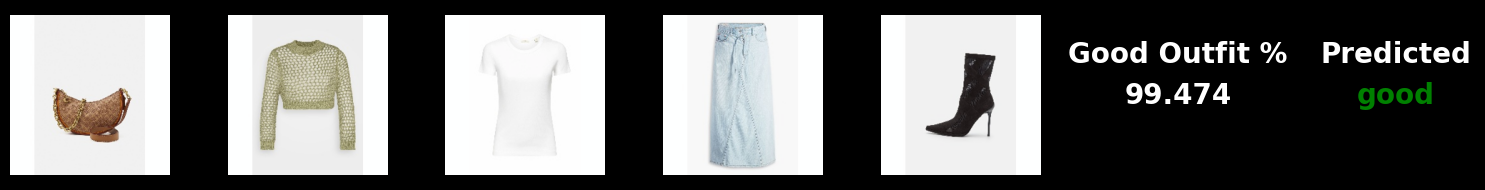

6


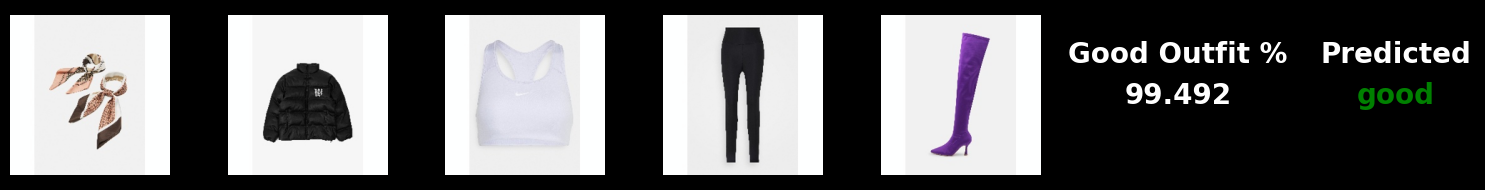

,Innerwear_imagePath,Bottomwear_imagePath,Shoes_imagePath,Accessoire_imagePath,Outerwear_imagePath
0,woman_outfits/zek3EB_EQIi/1.jpg,woman_outfits/zek3EB_EQIi/2.jpg,woman_outfits/m02Jg7GTTLu/3.jpg,woman_outfits/PgW6nlY4StW/3.jpg,woman_outfits/n0iYLaxsRIu/0.jpg
1,woman_outfits/Bmocp3RnRn6/0.jpg,woman_outfits/Bmocp3RnRn6/2.jpg,woman_outfits/J4ZrCBLXQJG/3.jpg,woman_outfits/IAYEd_aSSOO/3.jpg,woman_outfits/jAcGpVI8Q0e/2.jpg
2,woman_outfits/zJam15enRC6/0.jpg,woman_outfits/zJam15enRC6/1.jpg,woman_outfits/D9ikgesSSVK/3.jpg,woman_outfits/ILeRH4RaTpG/3.jpg,woman_outfits/4e6rPvwhQ5i/1.jpg
3,woman_outfits/DddwQ3ieSfq/0.jpg,woman_outfits/DddwQ3ieSfq/1.jpg,woman_outfits/IL3GUbtCSfG/2.jpg,woman_outfits/MndPUhfjS_O/5.jpg,woman_outfits/uIVge-7YRsq/1.jpg
4,woman_outfits/rehkw8rvSVW/1.jpg,woman_outfits/rehkw8rvSVW/2.jpg,woman_outfits/Mj8lALE0Rv2/2.jpg,woman_outfits/Bcl3MGYySCa/4.jpg,woman_outfits/lcxtixx9RF-/0.jpg
5,woman_outfits/8DlZQmvPRYC/0.jpg,woman_outfits/8DlZQmvPRYC/1.jpg,woman_outfits/HuH7VkyYRK-/4.jpg,woman_outfits/wUgelvTFTXG/4.jpg,woman_outfits/rA5rZfrVTS6/0.jpg
6,woman_outfits/FxDzpbEHQSu/1.jpg,woman_outfits/FxDzpbEHQSu/2.jpg,woman_outfits/xs8oiaP5QF2/2.jpg,woman_outfits/Ioh2pt_jTxa/3.jpg,woman_outfits/GD3eOqgQTU2/0.jpg


In [7]:
classifyer = OutfitClassifier.create_from_pth_file(
    '../trained_models/cosmic-sunset-49-q1-threshold.pth', device
).eval()

good_outfits = outfit_recommendre.get_good_outfits(classifyer, clothing_items_df, number_of_good_outfits, './outfits', random_state=random_seed)
good_outfits

# lively-planet-39 (q1-threshold)

Using cache found in /Users/romanzberg/.cache/torch/hub/facebookresearch_dinov2_main


0


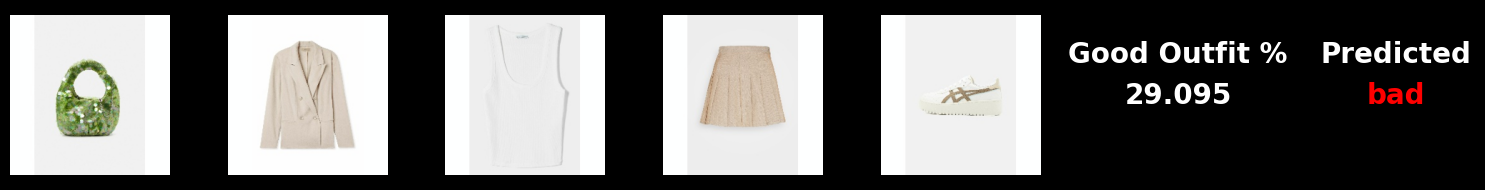

1


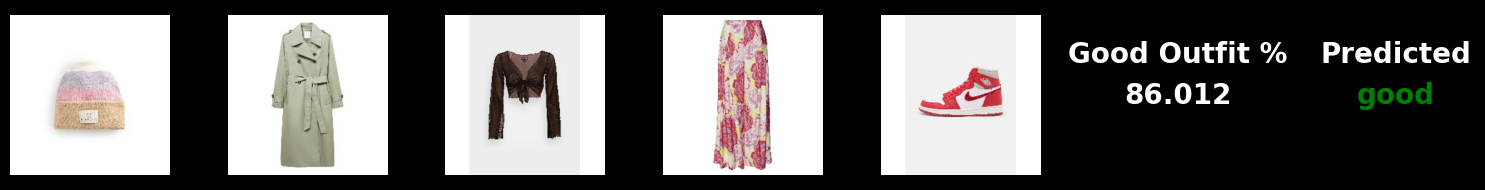

2


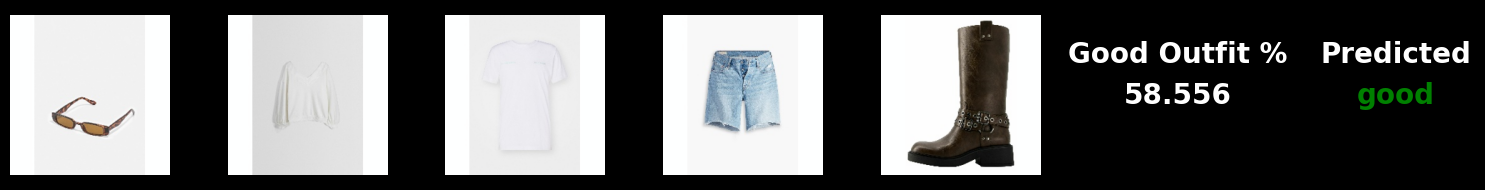

3


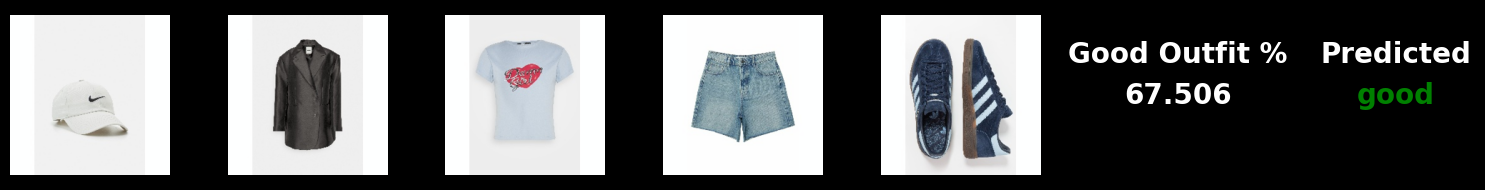

4


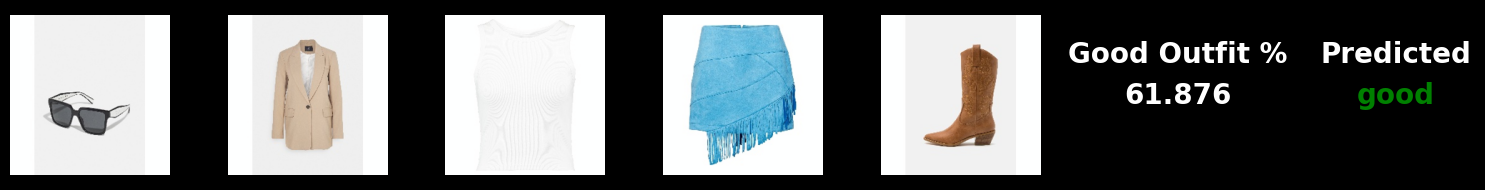

5


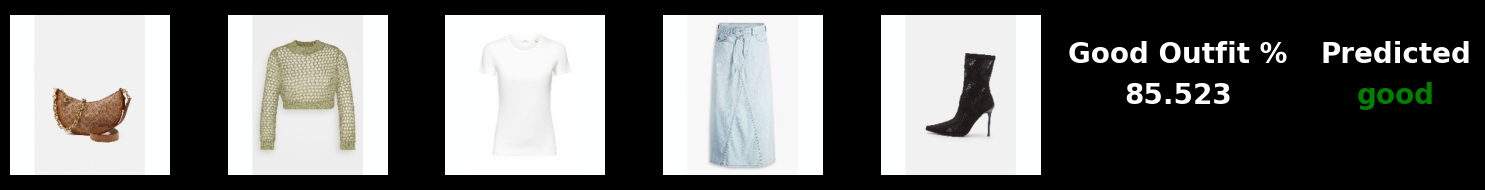

6


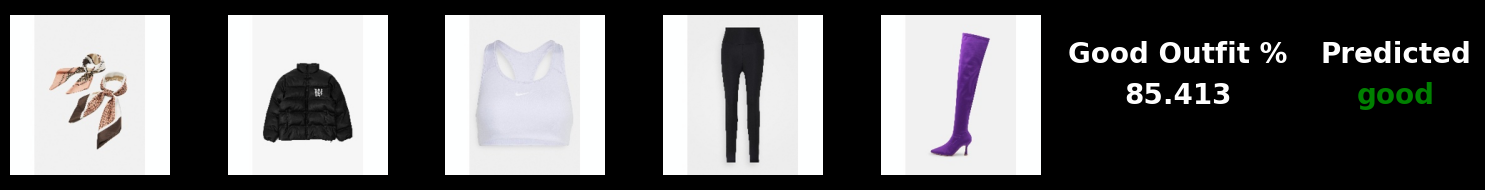

0


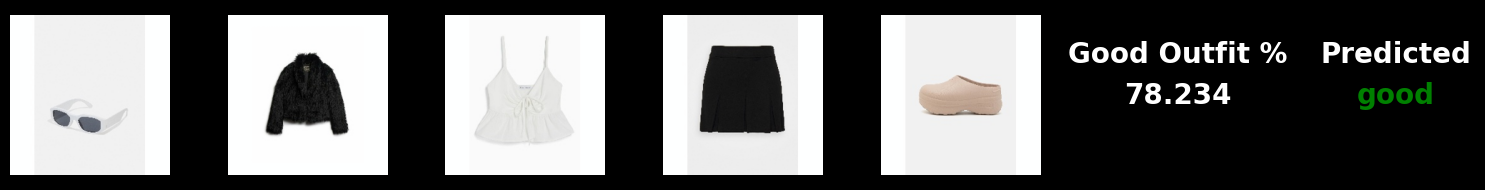

,Innerwear_imagePath,Bottomwear_imagePath,Shoes_imagePath,Accessoire_imagePath,Outerwear_imagePath
1,woman_outfits/Bmocp3RnRn6/0.jpg,woman_outfits/Bmocp3RnRn6/2.jpg,woman_outfits/J4ZrCBLXQJG/3.jpg,woman_outfits/IAYEd_aSSOO/3.jpg,woman_outfits/jAcGpVI8Q0e/2.jpg
2,woman_outfits/zJam15enRC6/0.jpg,woman_outfits/zJam15enRC6/1.jpg,woman_outfits/D9ikgesSSVK/3.jpg,woman_outfits/ILeRH4RaTpG/3.jpg,woman_outfits/4e6rPvwhQ5i/1.jpg
3,woman_outfits/DddwQ3ieSfq/0.jpg,woman_outfits/DddwQ3ieSfq/1.jpg,woman_outfits/IL3GUbtCSfG/2.jpg,woman_outfits/MndPUhfjS_O/5.jpg,woman_outfits/uIVge-7YRsq/1.jpg
4,woman_outfits/rehkw8rvSVW/1.jpg,woman_outfits/rehkw8rvSVW/2.jpg,woman_outfits/Mj8lALE0Rv2/2.jpg,woman_outfits/Bcl3MGYySCa/4.jpg,woman_outfits/lcxtixx9RF-/0.jpg
5,woman_outfits/8DlZQmvPRYC/0.jpg,woman_outfits/8DlZQmvPRYC/1.jpg,woman_outfits/HuH7VkyYRK-/4.jpg,woman_outfits/wUgelvTFTXG/4.jpg,woman_outfits/rA5rZfrVTS6/0.jpg
6,woman_outfits/FxDzpbEHQSu/1.jpg,woman_outfits/FxDzpbEHQSu/2.jpg,woman_outfits/xs8oiaP5QF2/2.jpg,woman_outfits/Ioh2pt_jTxa/3.jpg,woman_outfits/GD3eOqgQTU2/0.jpg
0,woman_outfits/b4UYh95IT36/1.jpg,woman_outfits/b4UYh95IT36/2.jpg,woman_outfits/wZqdUYFIT-W/4.jpg,woman_outfits/JZVNGblUTq2/3.jpg,woman_outfits/WbjHVdFATqS/0.jpg


In [8]:
classifyer = OutfitClassifier.create_from_pth_file(
    '../trained_models/lively-planet-39-q1-threshold.pth', device
).eval()

good_outfits = outfit_recommendre.get_good_outfits(classifyer, clothing_items_df, number_of_good_outfits, './outfits', random_state=random_seed)
good_outfits

# honest-grass-25 (median threshold)

Using cache found in /Users/romanzberg/.cache/torch/hub/facebookresearch_dinov2_main


0


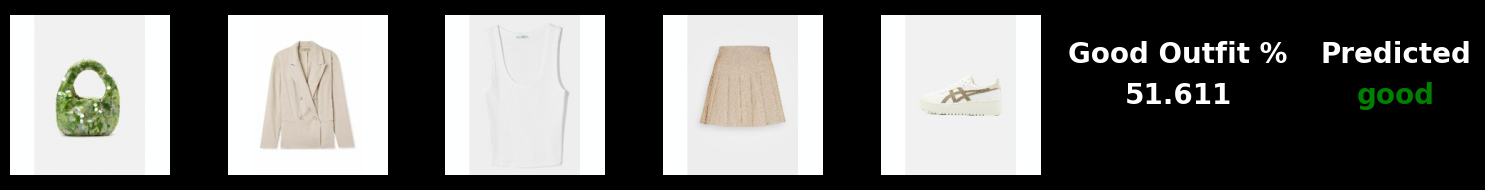

1


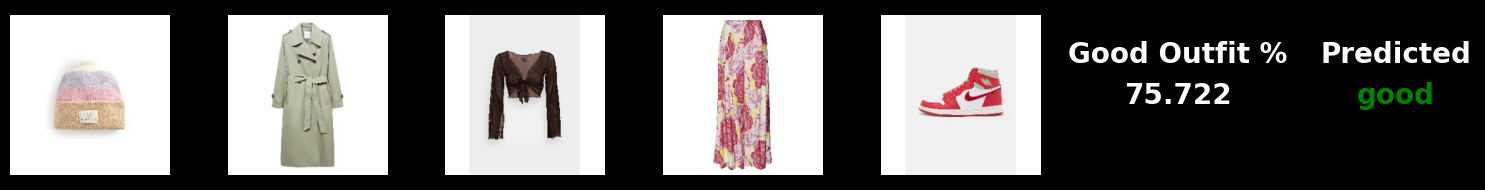

2


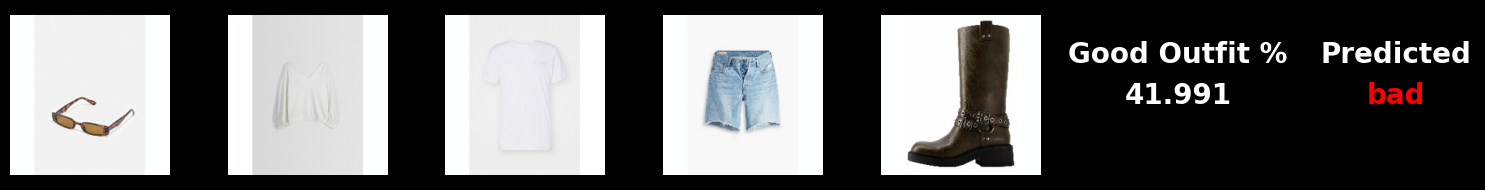

3


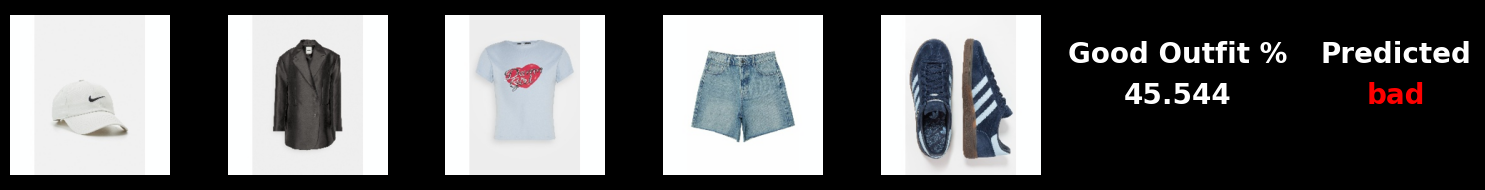

4


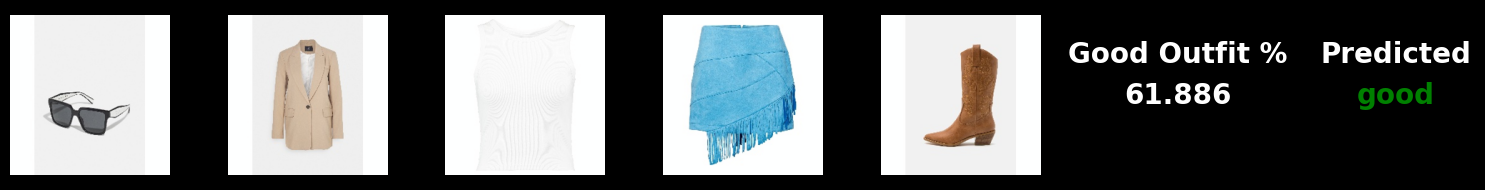

5


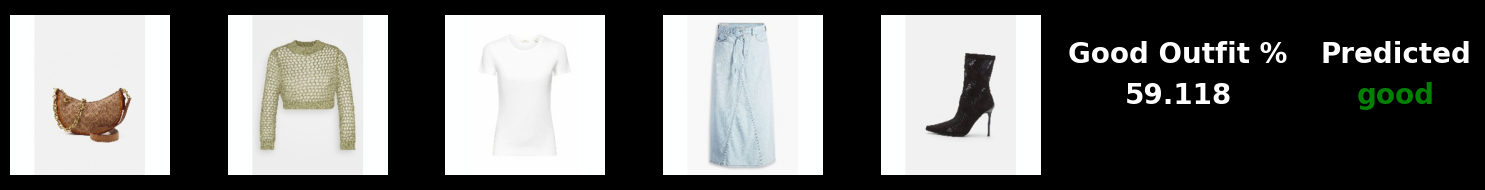

6


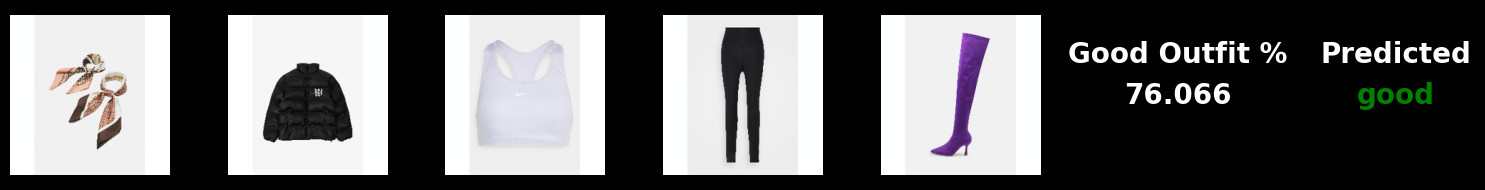

0


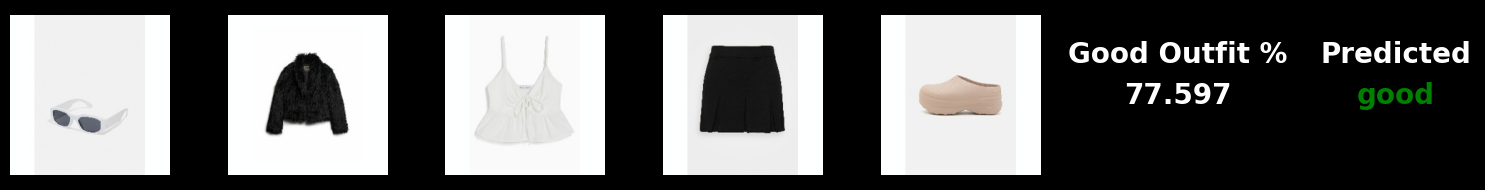

1


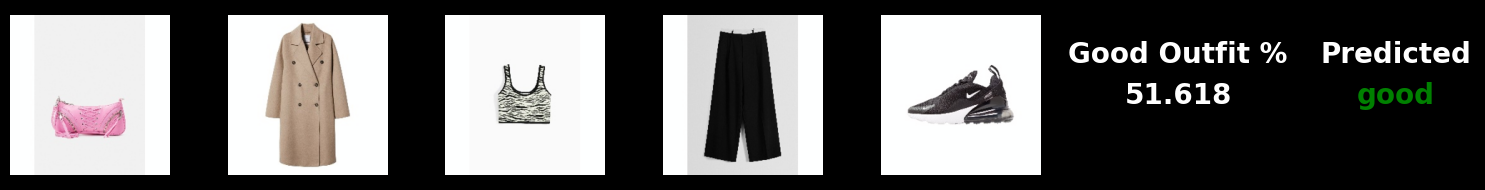

,Innerwear_imagePath,Bottomwear_imagePath,Shoes_imagePath,Accessoire_imagePath,Outerwear_imagePath
0,woman_outfits/zek3EB_EQIi/1.jpg,woman_outfits/zek3EB_EQIi/2.jpg,woman_outfits/m02Jg7GTTLu/3.jpg,woman_outfits/PgW6nlY4StW/3.jpg,woman_outfits/n0iYLaxsRIu/0.jpg
1,woman_outfits/Bmocp3RnRn6/0.jpg,woman_outfits/Bmocp3RnRn6/2.jpg,woman_outfits/J4ZrCBLXQJG/3.jpg,woman_outfits/IAYEd_aSSOO/3.jpg,woman_outfits/jAcGpVI8Q0e/2.jpg
4,woman_outfits/rehkw8rvSVW/1.jpg,woman_outfits/rehkw8rvSVW/2.jpg,woman_outfits/Mj8lALE0Rv2/2.jpg,woman_outfits/Bcl3MGYySCa/4.jpg,woman_outfits/lcxtixx9RF-/0.jpg
5,woman_outfits/8DlZQmvPRYC/0.jpg,woman_outfits/8DlZQmvPRYC/1.jpg,woman_outfits/HuH7VkyYRK-/4.jpg,woman_outfits/wUgelvTFTXG/4.jpg,woman_outfits/rA5rZfrVTS6/0.jpg
6,woman_outfits/FxDzpbEHQSu/1.jpg,woman_outfits/FxDzpbEHQSu/2.jpg,woman_outfits/xs8oiaP5QF2/2.jpg,woman_outfits/Ioh2pt_jTxa/3.jpg,woman_outfits/GD3eOqgQTU2/0.jpg
0,woman_outfits/b4UYh95IT36/1.jpg,woman_outfits/b4UYh95IT36/2.jpg,woman_outfits/wZqdUYFIT-W/4.jpg,woman_outfits/JZVNGblUTq2/3.jpg,woman_outfits/WbjHVdFATqS/0.jpg
1,woman_outfits/n5FK6BddTlG/1.jpg,woman_outfits/n5FK6BddTlG/2.jpg,woman_outfits/4e6rPvwhQ5i/3.jpg,woman_outfits/1k7M6sH-TiC/3.jpg,woman_outfits/nTXDav-NTA-/0.jpg


In [9]:
classifyer = OutfitClassifier.create_from_pth_file(
    '../trained_models/honest-grass-25-median-threshold.pth', device
).eval()

good_outfits = outfit_recommendre.get_good_outfits(classifyer, clothing_items_df, number_of_good_outfits, './outfits', random_state=random_seed)
good_outfits

# volanic-moon-9 (median threshold)

Using cache found in /Users/romanzberg/.cache/torch/hub/facebookresearch_dinov2_main


0


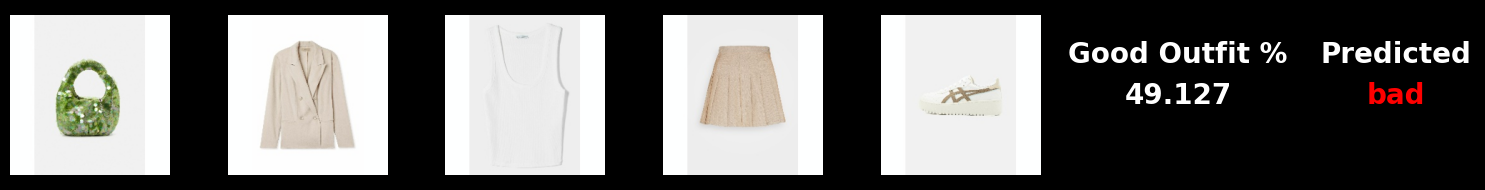

1


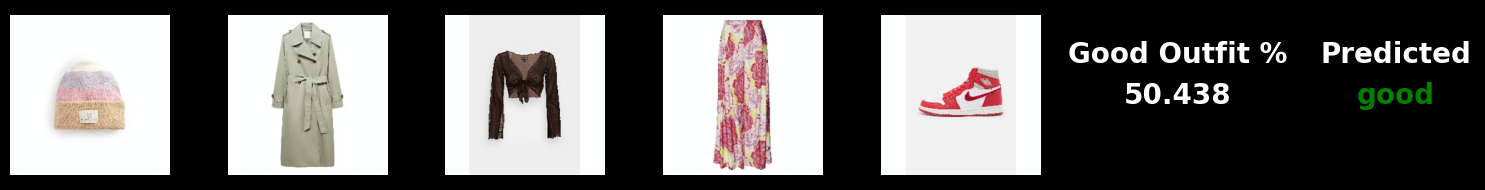

2


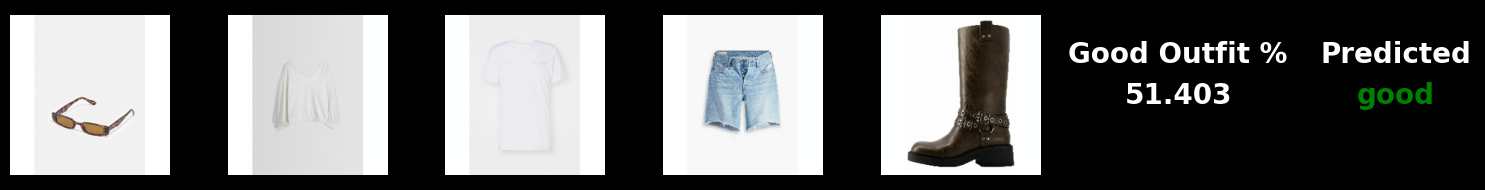

3


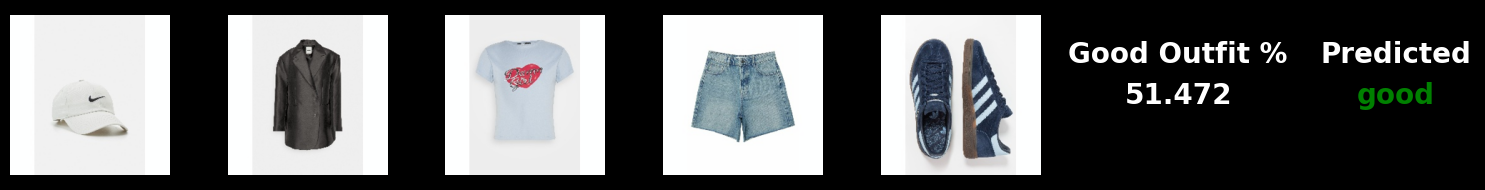

4


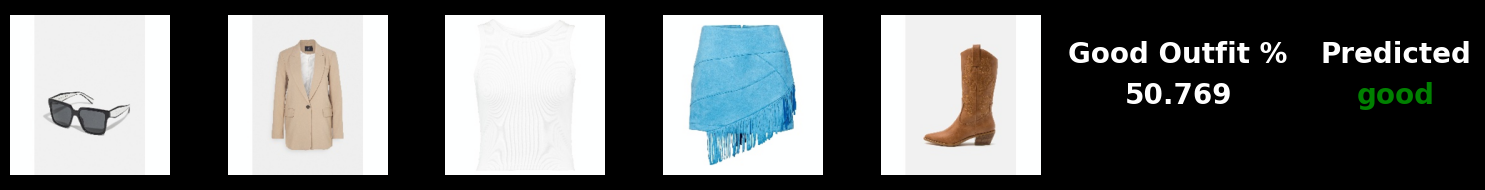

5


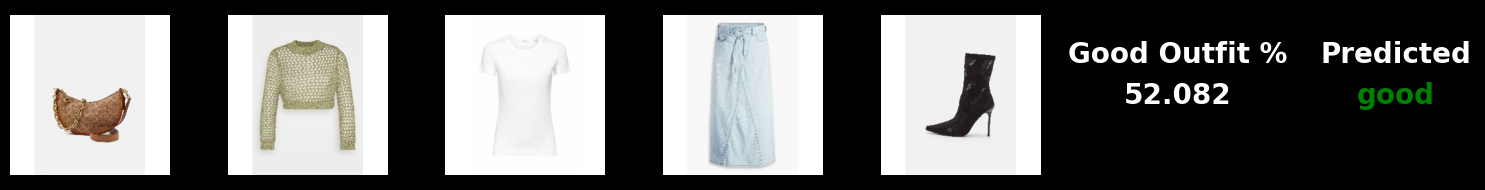

6


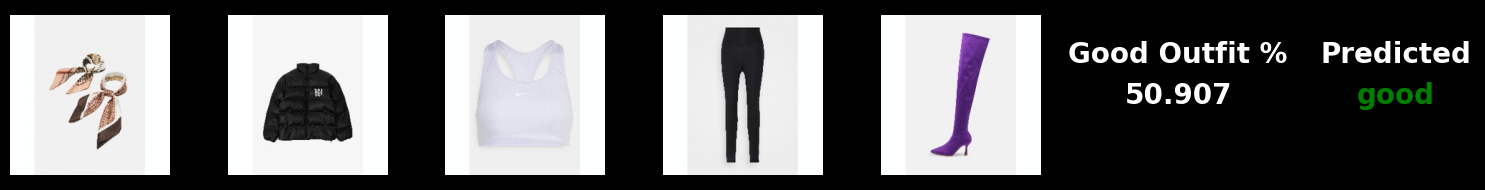

0


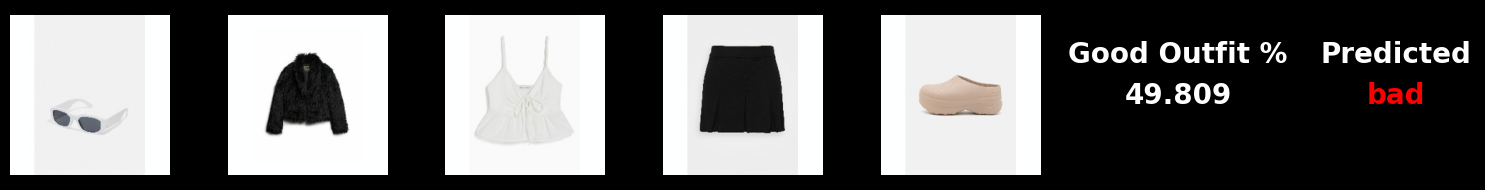

0


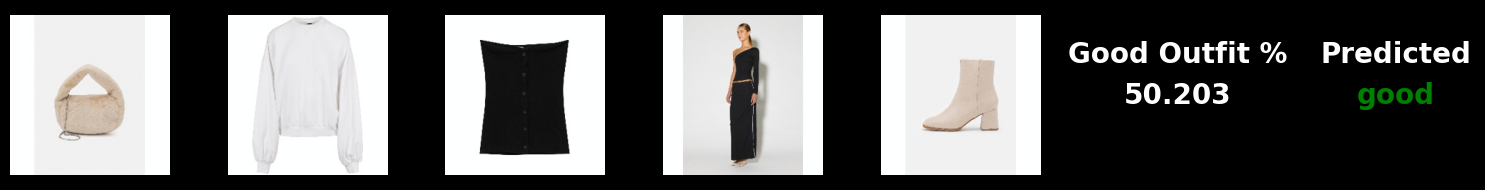

,Innerwear_imagePath,Bottomwear_imagePath,Shoes_imagePath,Accessoire_imagePath,Outerwear_imagePath
1,woman_outfits/Bmocp3RnRn6/0.jpg,woman_outfits/Bmocp3RnRn6/2.jpg,woman_outfits/J4ZrCBLXQJG/3.jpg,woman_outfits/IAYEd_aSSOO/3.jpg,woman_outfits/jAcGpVI8Q0e/2.jpg
2,woman_outfits/zJam15enRC6/0.jpg,woman_outfits/zJam15enRC6/1.jpg,woman_outfits/D9ikgesSSVK/3.jpg,woman_outfits/ILeRH4RaTpG/3.jpg,woman_outfits/4e6rPvwhQ5i/1.jpg
3,woman_outfits/DddwQ3ieSfq/0.jpg,woman_outfits/DddwQ3ieSfq/1.jpg,woman_outfits/IL3GUbtCSfG/2.jpg,woman_outfits/MndPUhfjS_O/5.jpg,woman_outfits/uIVge-7YRsq/1.jpg
4,woman_outfits/rehkw8rvSVW/1.jpg,woman_outfits/rehkw8rvSVW/2.jpg,woman_outfits/Mj8lALE0Rv2/2.jpg,woman_outfits/Bcl3MGYySCa/4.jpg,woman_outfits/lcxtixx9RF-/0.jpg
5,woman_outfits/8DlZQmvPRYC/0.jpg,woman_outfits/8DlZQmvPRYC/1.jpg,woman_outfits/HuH7VkyYRK-/4.jpg,woman_outfits/wUgelvTFTXG/4.jpg,woman_outfits/rA5rZfrVTS6/0.jpg
6,woman_outfits/FxDzpbEHQSu/1.jpg,woman_outfits/FxDzpbEHQSu/2.jpg,woman_outfits/xs8oiaP5QF2/2.jpg,woman_outfits/Ioh2pt_jTxa/3.jpg,woman_outfits/GD3eOqgQTU2/0.jpg
0,woman_outfits/KAUQsuOeTqu/0.jpg,woman_outfits/KAUQsuOeTqu/1.jpg,woman_outfits/nwMgjnCUQia/3.jpg,woman_outfits/Vlh1laWqRZq/3.jpg,woman_outfits/hv0CP-b3Teu/1.jpg


In [10]:
classifyer = OutfitClassifier.create_from_pth_file(
    '../trained_models/volanic-moon-9-median-threshold.pth', device
).eval()

good_outfits = outfit_recommendre.get_good_outfits(classifyer, clothing_items_df, number_of_good_outfits, './outfits', random_state=random_seed)
good_outfits